In [6]:
import pandas as pd
import os
import string
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
import pickle
print('NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)')

print('UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED')
# nltk.download('all')
stopword = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()


NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)
UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED


In [7]:
!wget http://7c4292c7e0ca.ngrok.io/data.zip

--2020-08-26 08:22:30--  http://7c4292c7e0ca.ngrok.io/data.zip
Resolving 7c4292c7e0ca.ngrok.io (7c4292c7e0ca.ngrok.io)... 3.135.90.78, 2600:1f16:d83:1201::6e:1
Connecting to 7c4292c7e0ca.ngrok.io (7c4292c7e0ca.ngrok.io)|3.135.90.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94843337 (90M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  90.45M   637KB/s    in 2m 55s  

2020-08-26 08:25:27 (529 KB/s) - ‘data.zip’ saved [94843337/94843337]



In [8]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv  
  inflating: tfidf_content.pickle    
  inflating: tfidf_subject.pickle    


In [9]:
def preprocess(df):
    
    df = df[df.columns.drop(list(df.filter(regex='^Cat')))]
    df = df[df['Date'] != '27/06/2001']  #removing the date
    df[(df['Subject'] != 'RE:') & (df['Subject'] != 'FW:') & (df['Subject'] != 'Re:')]  #removing the max same subjects
    del df['Unnamed: 0']
    return df

In [10]:
def clean_text(text):
    text_nopunct = "".join([char for char in text.lower() if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct) #tokenize
    words_without_stopwords = [word for word in tokens if word not in stopword] #remove stopwords from tokens
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words_without_stopwords]

In [11]:
DATA = 'data' #https://data.world/brianray/enron-email-dataset

FILENAMES = [os.path.join(DATA, filename) for filename in os.listdir(DATA)]
df = pd.read_csv('data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv')
df = preprocess(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df = df[df['Subject'].notna()]
df = df[df['content'].notna()]
df[df['content'].isna()].shape

(0, 15)

In [13]:

dfEmail = df[['Subject', 'content']]
dfEmail.head()

,Subject,content
1,Re:,Traveling to have a business meeting takes the...
2,Re: test,test successful. way to go!!!
4,Re: Hello,Let's shoot for Tuesday at 11:45.
5,Re: Hello,"Greg, How about either next Tuesday or Thursda..."
7,Re: PRC review - phone calls,any morning between 10 and 11:30


In [14]:
content_vecotrizer = pickle.load(open('tfidf_content.pickle', "rb"))
subject_vecotrizer = pickle.load(open('tfidf_subject.pickle', "rb"))
print('Vectorizer Loaded!!')

Vectorizer Loaded!!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [15]:
subject_matrix = subject_vecotrizer.transform(df['Subject'])

In [25]:
dfSubject = pd.DataFrame(subject_matrix.toarray(), columns=subject_vecotrizer.get_feature_names())

In [26]:
dfSubject.head()

,,0,00,000,00000000000000000000000000000000000weil,000000000055936,000000000078904,0000105674,0000108727,0000110257,...,zipter,zombie,zonal,zone,zooey,zoomerang,zpro,zulie,zycher,zykorie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
content_matrix = content_vecotrizer.transform(df['content'])

combine **subject** and **content** tfidf matrix

In [27]:
type(content_matrix)

scipy.sparse.csr.csr_matrix

In [28]:
import scipy.sparse as sp

a = sp.csr_matrix([[1,2,3],[4,5,6]])
print("a")
print(a.toarray())
print("b")
b = sp.csr_matrix([[7,8,9],[10,11,12]])
print(b.toarray())
print("c")
c = sp.hstack((a,b))  # NOT np.vstack
print(c.toarray())


a
[[1 2 3]
 [4 5 6]]
b
[[ 7  8  9]
 [10 11 12]]
c
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [21]:
matrix =  sp.hstack((subject_matrix,content_matrix))

In [22]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

In [23]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(5,15)
for k in K:
    km = KMeans(n_clusters=k, n_jobs=-1) #-1 will use all cores of CPU for computation
    km = km.fit(matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
    
print("Sum of squared distances : " ,sosd)


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


5processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


6processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


7processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


8processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


9processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


10processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


11processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


12processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


13processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


14processed
Sum of squared distances :  [181861.45844088378, 181470.28957695063, 180828.5682397169, 180484.63181013407, 180414.31224679833, 179726.5445876351, 179554.11158248264, 179015.25168092718, 179015.90429276446, 178415.35788247973]


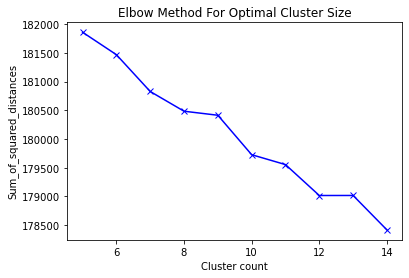

In [24]:

#Plot sosd against number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K, sosd, 'bx-')
plt.xlabel('Cluster count')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Cluster Size')
plt.show()

In [30]:
#Split data into 9 clusters
kmeans = KMeans(n_clusters=9, n_jobs=-1).fit(matrix)

#get Cluster labels.
clusters= kmeans.labels_

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [32]:
clusters.shape

(94464,)

In [33]:
len(set(clusters))

9

In [34]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))